<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/Binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 26.2 MB/s 
     |████████████████████████████████| 2.0 MB 48.9 MB/s 
     |████████████████████████████████| 1.7 MB 71.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 10.4 MB 72.3 MB/s 
     |████████████████████████████████| 262 kB 77.1 MB/s 
     |████████████████████████████████| 88 kB 7.8 MB/s 
     |████████████████████████████████| 3.3 MB 48.3 MB/s 
     |████████████████████████████████| 6.8 MB 67.2 MB/s 
     |████████████████████████████████| 56 kB 6.7 MB/s 
     |████████████████████████████████| 1.3 MB 82.0 MB/s 
     |████████████████████████████████| 134 kB 92.0 MB/s 
     |████████████████████████████████|

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.datasets import get_data
import pandas as pd

In [33]:
file = '/content/drive/MyDrive/DataMining_Datasets/citrus.csv'
data = pd.read_csv(file)
data.tail()

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


In [4]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import jinja2

In [34]:
data.shape

(10000, 6)

In [35]:
data_set = data.sample(frac = 0.90, random_state=786)
data_unseen = data.drop(data_set.index)

#data.reset_index(inplace=True, drop=True)
#data_unseen.reset_index(inplace = True, drop = True)

print("data for modelling "+str(data_set.shape))
print("unseen data for predictions "+str(data_unseen.shape))

data for modelling (9000, 6)
unseen data for predictions (1000, 6)


In [36]:
from pycaret.classification import *

In [37]:
binary_cluster = setup(data = data_set, target = 'name', session_id=2)
                  #normalize = True, 
                  #transformation = True, 
                  #ignore_low_variance = True,
                  #remove_multicollinearity = True, 
                  #multicollinearity_threshold = 0.95,
                  #bin_numeric_features = ['hypertension', 'heart_disease'])
#log_experiment = True, experiment_name = 'stroke_classify_1'
#group_features = [['ever_married', 'work_type', 'Residence_type']],

,Description,Value
0,session_id,2
1,Target,name
2,Target Type,Binary
3,Label Encoded,"grapefruit: 0, orange: 1"
4,Original Data,"(9000, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='name',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [38]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9248,0.9788,0.9274,0.9234,0.9254,0.8495,0.8496,0.035
ridge,Ridge Classifier,0.9233,0.0000,0.9296,0.9189,0.9242,0.8466,0.8468,0.011
lda,Linear Discriminant Analysis,0.9233,0.9788,0.9296,0.9189,0.9242,0.8466,0.8468,0.016
qda,Quadratic Discriminant Analysis,0.9219,0.9767,0.9262,0.9192,0.9227,0.8438,0.8438,0.012
nb,Naive Bayes,0.9211,0.9768,0.9258,0.9180,0.9219,0.8422,0.8422,0.012
gbc,Gradient Boosting Classifier,0.9206,0.9763,0.9227,0.9198,0.9212,0.8412,0.8413,0.309
ada,Ada Boost Classifier,0.9174,0.9747,0.9218,0.9149,0.9182,0.8349,0.8351,0.146
knn,K Neighbors Classifier,0.9163,0.9605,0.9199,0.9146,0.9171,0.8327,0.8329,0.124
rf,Random Forest Classifier,0.9160,0.9734,0.9176,0.9157,0.9166,0.8320,0.8321,0.668
lightgbm,Light Gradient Boosting Machine,0.9146,0.9749,0.9170,0.9137,0.9153,0.8292,0.8293,0.114


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9817,0.9243,0.9214,0.9228,0.8444,0.8444
1,0.9206,0.9772,0.9306,0.9133,0.9219,0.8412,0.8414
2,0.9222,0.9802,0.9117,0.9323,0.9219,0.8445,0.8447
3,0.9397,0.9806,0.9432,0.9373,0.9403,0.8794,0.8794
4,0.9175,0.9733,0.9243,0.9128,0.9185,0.8349,0.8350
5,0.9206,0.9789,0.9243,0.9185,0.9214,0.8413,0.8413
6,0.9238,0.9783,0.9211,0.9270,0.9241,0.8476,0.8476
7,0.9270,0.9787,0.9338,0.9221,0.9279,0.8540,0.8540
8,0.9222,0.9775,0.9180,0.9268,0.9223,0.8444,0.8445


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#dt = create_model('dt', fold = 5)

In [40]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#tuned_dt = tune_model(dt)

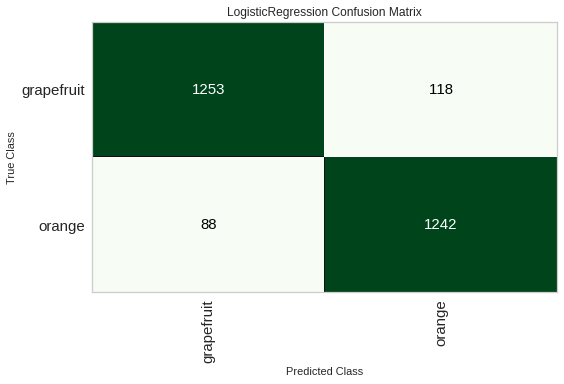

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [41]:
plot_model(lr, plot = 'confusion_matrix')

In [42]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9817,0.9243,0.9214,0.9228,0.8444,0.8444
1,0.9206,0.9772,0.9306,0.9133,0.9219,0.8412,0.8414
2,0.9222,0.9802,0.9117,0.9323,0.9219,0.8445,0.8447
3,0.9397,0.9806,0.9432,0.9373,0.9403,0.8794,0.8794
4,0.9175,0.9733,0.9243,0.9128,0.9185,0.8349,0.8350
5,0.9206,0.9789,0.9243,0.9185,0.9214,0.8413,0.8413
6,0.9238,0.9783,0.9211,0.9270,0.9241,0.8476,0.8476
7,0.9270,0.9787,0.9338,0.9221,0.9279,0.8540,0.8540
8,0.9222,0.9775,0.9180,0.9268,0.9223,0.8444,0.8445


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=5.764, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [43]:
print(tuned_lr)

LogisticRegression(C=5.764, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
create_app(tuned_lr)

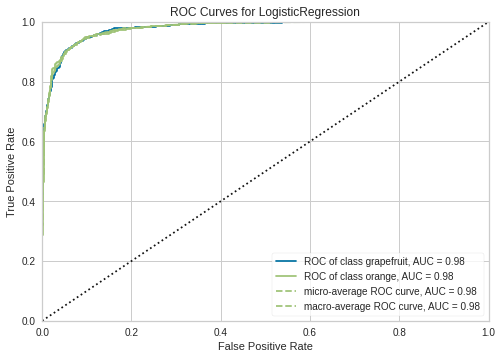

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [44]:
plot_model(tuned_lr, plot = 'auc')

In [ ]:
#rf = create_model('rf')

In [ ]:
#tuned_rf = tune_model(rf, optimize = 'Recall')

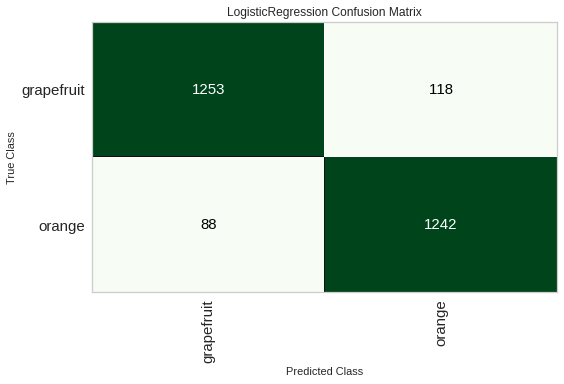

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [45]:
plot_model(tuned_lr, plot = 'confusion_matrix')

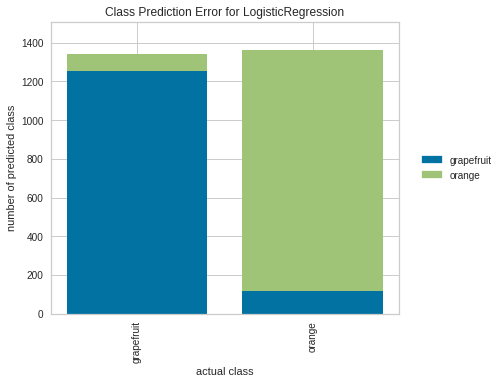

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
plot_model(tuned_lr, plot='error')

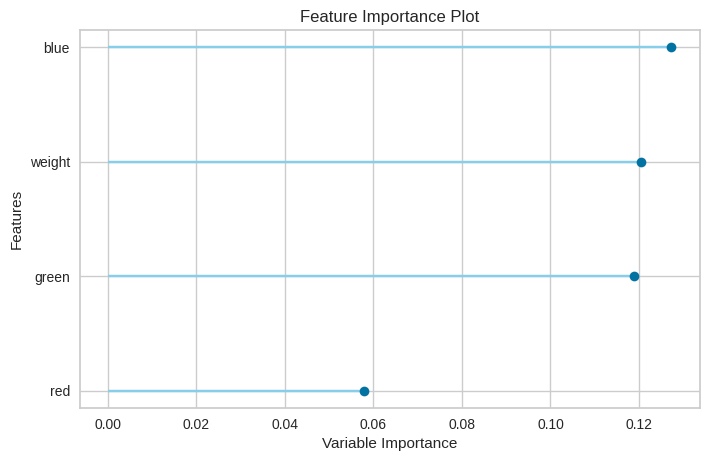

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [46]:
plot_model(tuned_lr, plot='feature')

In [47]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Recall, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=DummyClassifier(constant=None, random_state=2, strategy='prior'), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Dummy Classifier Imported succesfully
INFO:logs:Cross validation set to False
INFO:logs:Fitting Model
INFO:logs:DummyClassifier(constant=None, random_state=2, strategy='prior')
IN

DummyClassifier(constant=None, random_state=2, strategy='prior')

In [48]:
pred_body_perf = predict_model(tuned_lr, data = data_unseen)
pred_body_perf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=5.764, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.9861,0,0,0,0,0


,name,diameter,weight,red,green,blue,Label,Score
5,orange,4.59,95.86,142,100,2,orange,1.0000
18,orange,4.97,104.01,168,79,22,orange,0.9998
37,orange,5.35,107.01,158,97,2,orange,1.0000
39,orange,5.37,107.64,178,92,7,orange,1.0000
57,orange,5.53,110.40,169,76,3,orange,0.9999


In [49]:
save_model(tuned_lr,'Binary classification model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=5.764, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Binary classification model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='name',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                   

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='name',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=5.764, class_weight={}, dual=False,
                 

In [51]:
new_prediction = predict_model(tuned_lr, data = data_unseen)
new_prediction.head()
new_prediction.tail()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=5.764, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.9861,0,0,0,0,0


,name,diameter,weight,red,green,blue,Label,Score
9979,grapefruit,14.67,244.78,163,62,2,grapefruit,0.9998
9980,grapefruit,14.67,245.14,138,83,26,grapefruit,1.0000
9982,grapefruit,14.74,246.21,139,58,15,grapefruit,1.0000
9987,grapefruit,14.88,249.58,159,67,11,grapefruit,0.9999
9999,grapefruit,16.45,261.51,152,74,2,grapefruit,0.9999


In [52]:
from pycaret.utils import check_metric
check_metric(new_prediction['name'], new_prediction['Label'], metric = 'Accuracy')

0.941